#Aim:

Experimentation with and comparison of different optimizers

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/Iris.csv')
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 6)

In [8]:
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa
1   2      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa
2   3      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa
3   4      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa
4   5      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa


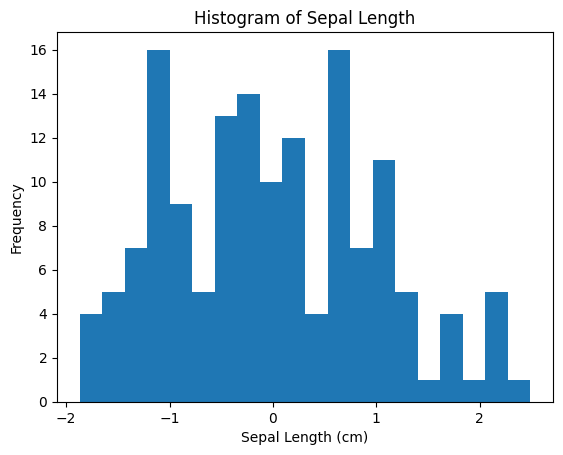

In [9]:
data.SepalLengthCm.plot(kind='hist', bins=20, title='Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(data[['Species']])
species_df = pd.DataFrame(species_encoded, columns=encoder.categories_[0])

data = pd.concat([data.drop('Species', axis=1), species_df], axis=1)

x = data.drop(encoder.categories_[0], axis=1)
y = species_encoded

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print(species_df.head(10))

x_train shape: (120, 5)
y_train shape: (120, 3)
x_val shape: (30, 5)
y_val shape: (30, 3)
   Iris-setosa  Iris-versicolor  Iris-virginica
0          1.0              0.0             0.0
1          1.0              0.0             0.0
2          1.0              0.0             0.0
3          1.0              0.0             0.0
4          1.0              0.0             0.0
5          1.0              0.0             0.0
6          1.0              0.0             0.0
7          1.0              0.0             0.0
8          1.0              0.0             0.0
9          1.0              0.0             0.0


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

model.summary()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.0763 - loss: 1.1417 - val_accuracy: 0.1667 - val_loss: 1.1361
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2062 - loss: 1.1299 - val_accuracy: 0.2333 - val_loss: 1.1271
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2694 - loss: 1.1182 - val_accuracy: 0.2667 - val_loss: 1.1185
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3785 - loss: 1.1070 - val_accuracy: 0.3000 - val_loss: 1.1105
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3529 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.1042
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3917 - loss: 1.0884 - val_accuracy: 0.3667 - val_loss: 1.0989
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3833 - loss: 1.0853 - val_accuracy: 0.3667 - val_loss: 1.0939
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3694 - loss: 1.0852 - val_accuracy: 0.3667 - val_loss: 1.0896
Epoch 9/50


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

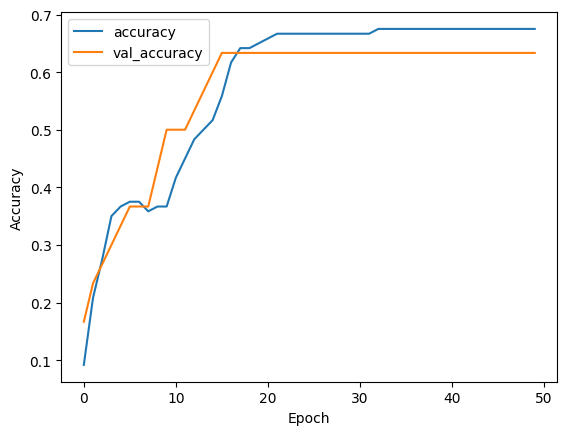

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.6379 - loss: 1.0585 - val_accuracy: 0.7000 - val_loss: 1.0121
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6654 - loss: 1.0130 - val_accuracy: 0.7000 - val_loss: 0.9402
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6652 - loss: 0.9321 - val_accuracy: 0.7000 - val_loss: 0.8710
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6596 - loss: 0.8805 - val_accuracy: 0.7000 - val_loss: 0.8118
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6648 - loss: 0.8371 - val_accuracy: 0.7000 - val_loss: 0.7552
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6815 - loss: 0.7650 - val_accuracy: 0.7667 - val_loss: 0.7024
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7527 - loss: 0.7128 - val_accuracy: 0.7667 - val_loss: 0.6511
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7335 - loss: 0.6653 - val_accuracy: 0.7667 - val_loss: 0.6035

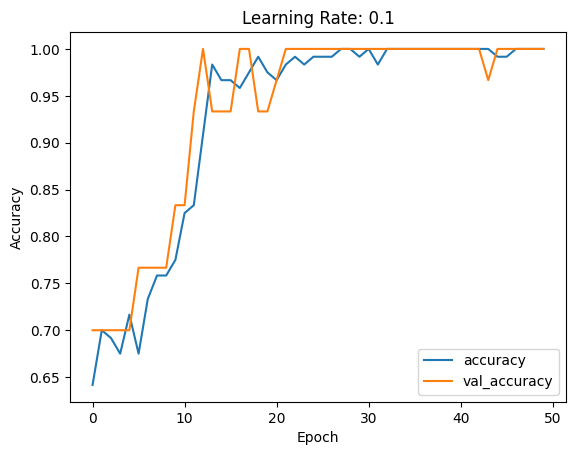

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3860 - loss: 1.1791 - val_accuracy: 0.3333 - val_loss: 1.1917
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4044 - loss: 1.1681 - val_accuracy: 0.3667 - val_loss: 1.1829
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4548 - loss: 1.1456 - val_accuracy: 0.4333 - val_loss: 1.1753
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4456 - loss: 1.1431 - val_accuracy: 0.4333 - val_loss: 1.1680
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4677 - loss: 1.1346 - val_accuracy: 0.4333 - val_loss: 1.1611
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4225 - loss: 1.1419 - val_accuracy: 0.4333 - val_loss: 1.1545
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5098 - loss: 1.1227 - val_accuracy: 0.4333 - val_loss: 1.1485
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4383 - loss: 1.1273 - val_accuracy: 0.4333 - val_loss: 1.1424

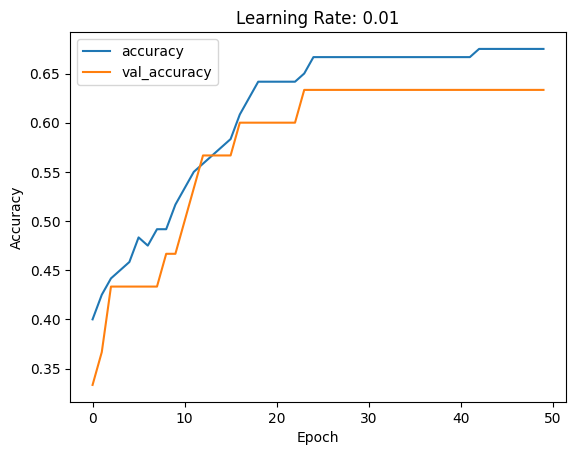

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5135 - loss: 1.0985 - val_accuracy: 0.4667 - val_loss: 1.1105
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5192 - loss: 1.0985 - val_accuracy: 0.4667 - val_loss: 1.1100
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5088 - loss: 1.1027 - val_accuracy: 0.4667 - val_loss: 1.1095
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4985 - loss: 1.1009 - val_accuracy: 0.4667 - val_loss: 1.1090
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5300 - loss: 1.0996 - val_accuracy: 0.4667 - val_loss: 1.1085
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5498 - loss: 1.0948 - val_accuracy: 0.4667 - val_loss: 1.1081
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5292 - loss: 1.0989 - val_accuracy: 0.4667 - val_loss: 1.1076
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5333 - loss: 1.1018 - val_accuracy: 0.4667 - val_loss: 1.1071


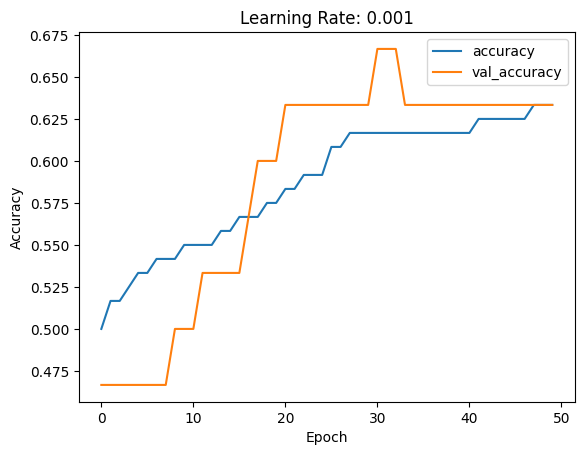

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3342 - loss: 0.9977 - val_accuracy: 0.3667 - val_loss: 0.9657
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3519 - loss: 0.9818 - val_accuracy: 0.3667 - val_loss: 0.9656
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3165 - loss: 1.0101 - val_accuracy: 0.3667 - val_loss: 0.9655
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3185 - loss: 1.0068 - val_accuracy: 0.3667 - val_loss: 0.9654
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3352 - loss: 0.9987 - val_accuracy: 0.3667 - val_loss: 0.9653
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3310 - loss: 1.0018 - val_accuracy: 0.3667 - val_loss: 0.9652
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2904 - loss: 1.0299 - val_accuracy: 0.3667 - val_loss: 0.9651
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3175 - loss: 1.0070 - val_accuracy: 0.3667 - val_loss: 0.9651


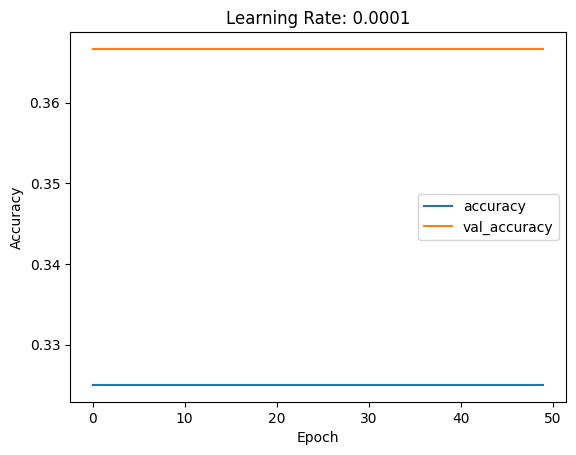

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Rate: {lr}')
    plt.legend()
    plt.show()


inference : best learning rate came as 0.01



validation accuracy reached 1.0000 and validation loss dropped to 0.2205 by the end of 50 epoch




Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5621 - loss: 1.0785 - val_accuracy: 0.6333 - val_loss: 1.0572
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6206 - loss: 1.0716 - val_accuracy: 0.6333 - val_loss: 1.0508
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6283 - loss: 1.0655 - val_accuracy: 0.6667 - val_loss: 1.0448
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6471 - loss: 1.0543 - val_accuracy: 0.6667 - val_loss: 1.0385
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6158 - loss: 1.0569 - val_accuracy: 0.7000 - val_loss: 1.0322
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6450 - loss: 1.0396 - val_accuracy: 0.7000 - val_loss: 1.0261
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6392 - loss: 1.0475 - val_accuracy: 0.7000 - val_loss: 1.0203
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6402 - loss: 1.0384 - val_accuracy: 0.7000 - val_loss: 1.0142


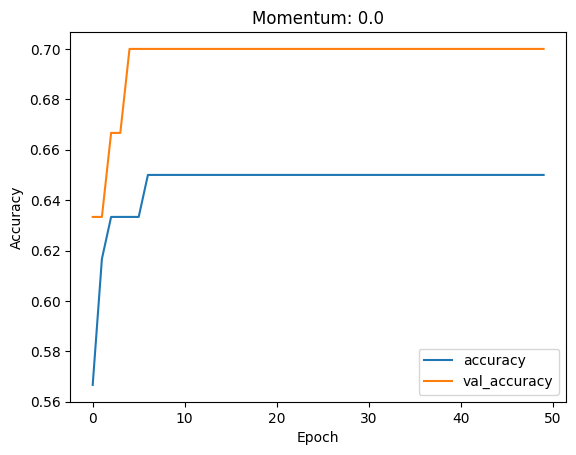

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3252 - loss: 1.0988 - val_accuracy: 0.3000 - val_loss: 1.1019
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3302 - loss: 1.0925 - val_accuracy: 0.3000 - val_loss: 1.0991
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3000 - loss: 1.0945 - val_accuracy: 0.3000 - val_loss: 1.0963
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3300 - loss: 1.0879 - val_accuracy: 0.3000 - val_loss: 1.0937
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3135 - loss: 1.0892 - val_accuracy: 0.3000 - val_loss: 1.0906
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2990 - loss: 1.0874 - val_accuracy: 0.3000 - val_loss: 1.0878
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3281 - loss: 1.0854 - val_accuracy: 0.3000 - val_loss: 1.0853
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3648 - loss: 1.0794 - val_accuracy: 0.3000 - val_loss: 1.0825


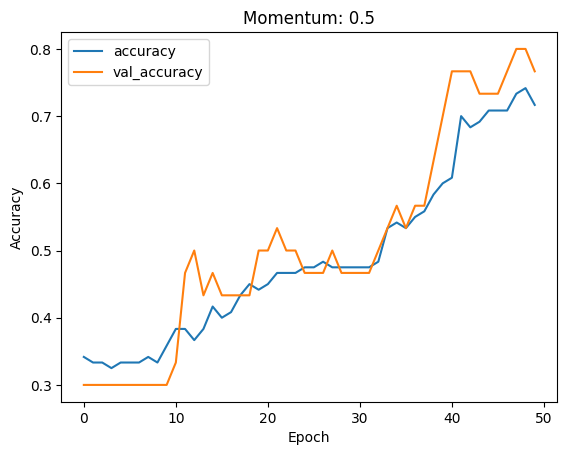

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.3648 - loss: 1.0744 - val_accuracy: 0.3000 - val_loss: 1.0997
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3010 - loss: 1.0820 - val_accuracy: 0.2333 - val_loss: 1.0804
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2619 - loss: 1.0728 - val_accuracy: 0.2333 - val_loss: 1.0569
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3521 - loss: 1.0499 - val_accuracy: 0.5667 - val_loss: 1.0346
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4660 - loss: 1.0324 - val_accuracy: 0.5667 - val_loss: 1.0116
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5677 - loss: 1.0216 - val_accuracy: 0.6667 - val_loss: 0.9895
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6333 - loss: 0.9993 - val_accuracy: 0.7000 - val_loss: 0.9655
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6375 - loss: 0.9756 - val_accuracy: 0.7000 - val_loss: 0.9413

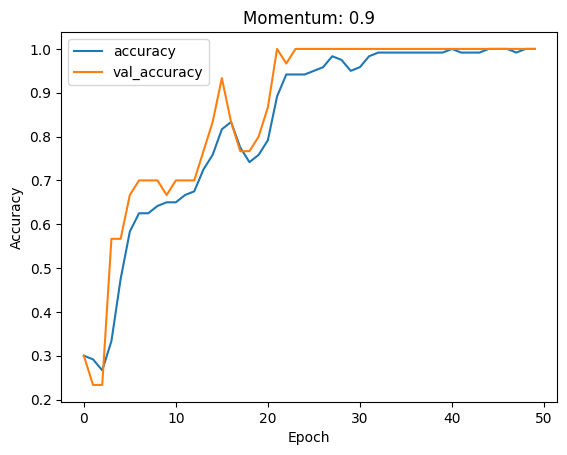

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3258 - loss: 1.0620 - val_accuracy: 0.3667 - val_loss: 1.0420
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3800 - loss: 1.0507 - val_accuracy: 0.6333 - val_loss: 1.0332
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6062 - loss: 1.0531 - val_accuracy: 0.6667 - val_loss: 1.0201
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6485 - loss: 1.0395 - val_accuracy: 0.6667 - val_loss: 1.0002
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6319 - loss: 1.0175 - val_accuracy: 0.6667 - val_loss: 0.9711
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6496 - loss: 0.9796 - val_accuracy: 0.6667 - val_loss: 0.9307
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6550 - loss: 0.9473 - val_accuracy: 0.7000 - val_loss: 0.8790
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6571 - loss: 0.8987 - val_accuracy: 0.7000 - val_loss: 0.8137


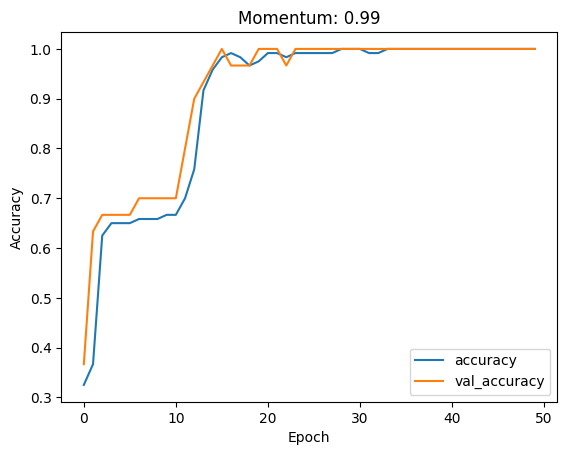

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

best_learning_rate = 0.01

momentum_values = [0.0, 0.5, 0.9, 0.99]

for momentum in momentum_values:
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=best_learning_rate, momentum=momentum),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Momentum: {momentum}')
    plt.legend()
    plt.show()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.3290 - loss: 1.0346 - val_accuracy: 0.3667 - val_loss: 1.0121
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2904 - loss: 1.0370 - val_accuracy: 0.3667 - val_loss: 1.0085
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3248 - loss: 1.0295 - val_accuracy: 0.3667 - val_loss: 1.0051
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3060 - loss: 1.0283 - val_accuracy: 0.4000 - val_loss: 1.0018
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3040 - loss: 1.0244 - val_accuracy: 0.4000 - val_loss: 0.9983
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3648 - loss: 1.0108 - val_accuracy: 0.4333 - val_loss: 0.9953
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3929 - loss: 1.0130 - val_accuracy: 0.4667 - val_loss: 0.9920
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4271 - loss: 1.0129 - val_accuracy: 0.5333 - val_loss: 0.9887


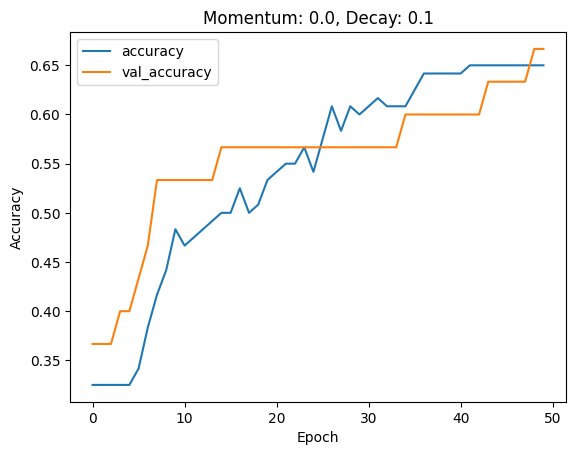

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3646 - loss: 1.1133 - val_accuracy: 0.3667 - val_loss: 1.1066
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3333 - loss: 1.1182 - val_accuracy: 0.3667 - val_loss: 1.1055
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3573 - loss: 1.1094 - val_accuracy: 0.3667 - val_loss: 1.1044
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3198 - loss: 1.1198 - val_accuracy: 0.3667 - val_loss: 1.1033
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2990 - loss: 1.1218 - val_accuracy: 0.3667 - val_loss: 1.1021
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3313 - loss: 1.1170 - val_accuracy: 0.3667 - val_loss: 1.1009
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3240 - loss: 1.1100 - val_accuracy: 0.3667 - val_loss: 1.0997
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3354 - loss: 1.1089 - val_accuracy: 0.3667 - val_loss: 1.0985

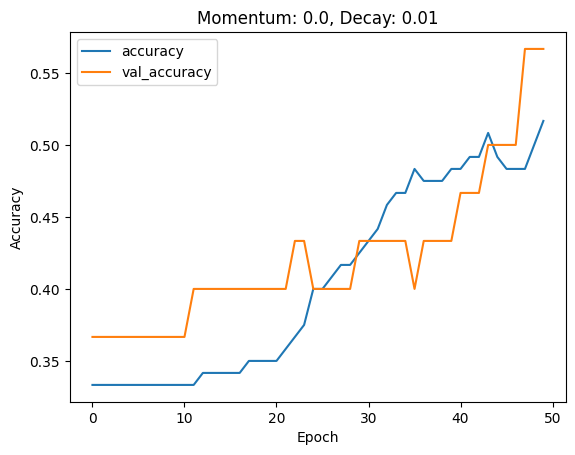

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0738 - loss: 1.1223 - val_accuracy: 0.0667 - val_loss: 1.1211
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0910 - loss: 1.1135 - val_accuracy: 0.1333 - val_loss: 1.1121
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2006 - loss: 1.1073 - val_accuracy: 0.2000 - val_loss: 1.1030
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3219 - loss: 1.0996 - val_accuracy: 0.4000 - val_loss: 1.0939
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4446 - loss: 1.0917 - val_accuracy: 0.5000 - val_loss: 1.0844
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4290 - loss: 1.0824 - val_accuracy: 0.4667 - val_loss: 1.0745
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4033 - loss: 1.0749 - val_accuracy: 0.5667 - val_loss: 1.0653
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4487 - loss: 1.0684 - val_accuracy: 0.5333 - val_loss: 1.0581


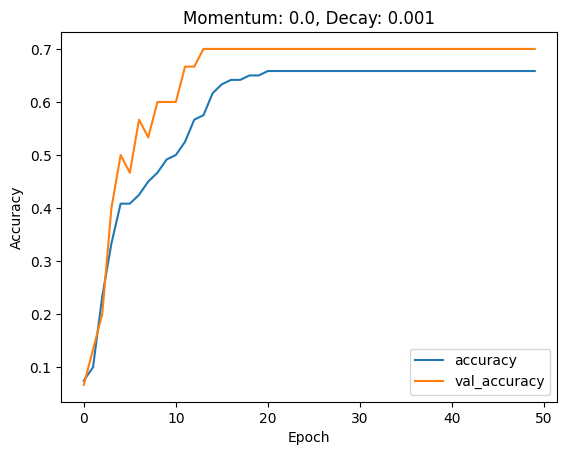

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.1762 - loss: 1.1365 - val_accuracy: 0.2000 - val_loss: 1.1296
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1798 - loss: 1.1304 - val_accuracy: 0.2000 - val_loss: 1.1190
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1873 - loss: 1.1185 - val_accuracy: 0.2333 - val_loss: 1.1102
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2117 - loss: 1.1129 - val_accuracy: 0.2333 - val_loss: 1.1064
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1790 - loss: 1.1085 - val_accuracy: 0.2667 - val_loss: 1.1045
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2300 - loss: 1.1076 - val_accuracy: 0.3000 - val_loss: 1.1030
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2875 - loss: 1.1061 - val_accuracy: 0.3333 - val_loss: 1.1022
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2925 - loss: 1.1045 - val_accuracy: 0.3667 - val_loss: 1.1017

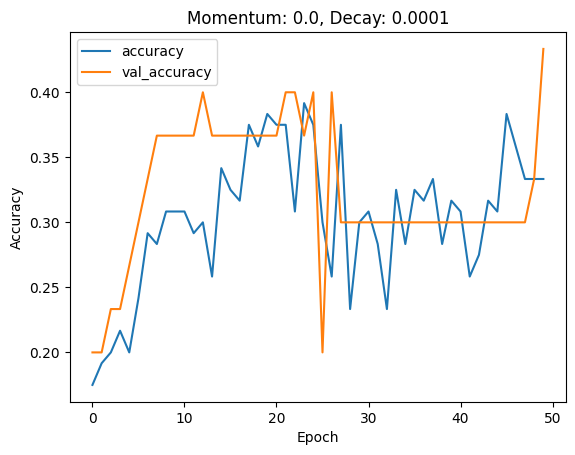

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3542 - loss: 1.0774 - val_accuracy: 0.3333 - val_loss: 1.0830
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3762 - loss: 1.0726 - val_accuracy: 0.4333 - val_loss: 1.0634
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4894 - loss: 1.0503 - val_accuracy: 0.4667 - val_loss: 1.0486
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5140 - loss: 1.0412 - val_accuracy: 0.6667 - val_loss: 1.0345
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6294 - loss: 1.0333 - val_accuracy: 0.8000 - val_loss: 1.0215
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6746 - loss: 1.0080 - val_accuracy: 0.8000 - val_loss: 1.0079
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7887 - loss: 0.9989 - val_accuracy: 0.7333 - val_loss: 0.9948
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7504 - loss: 0.9906 - val_accuracy: 0.7000 - val_loss: 0.9820


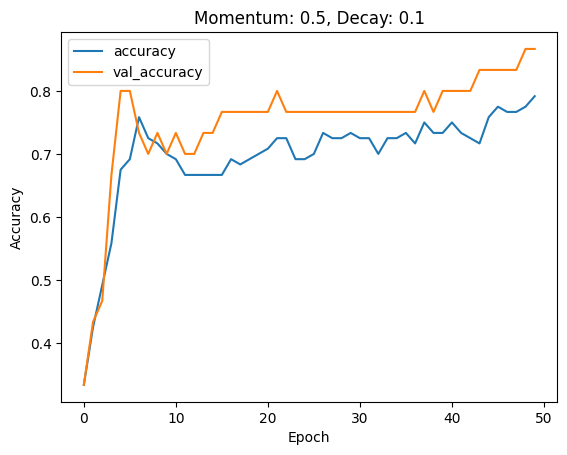

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3948 - loss: 1.0951 - val_accuracy: 0.4000 - val_loss: 1.0902
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3985 - loss: 1.0924 - val_accuracy: 0.5333 - val_loss: 1.0871
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5750 - loss: 1.0870 - val_accuracy: 0.7333 - val_loss: 1.0841
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7038 - loss: 1.0860 - val_accuracy: 0.8333 - val_loss: 1.0808
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7006 - loss: 1.0851 - val_accuracy: 0.8333 - val_loss: 1.0777
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7550 - loss: 1.0789 - val_accuracy: 0.8333 - val_loss: 1.0743
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7227 - loss: 1.0772 - val_accuracy: 0.8333 - val_loss: 1.0713
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7460 - loss: 1.0740 - val_accuracy: 0.8333 - val_loss: 1.0683


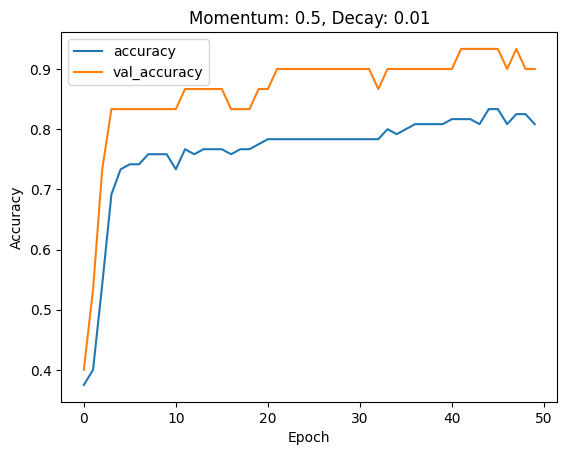

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3029 - loss: 1.1054 - val_accuracy: 0.3667 - val_loss: 1.0729
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2967 - loss: 1.0948 - val_accuracy: 0.3667 - val_loss: 1.0700
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3521 - loss: 1.0833 - val_accuracy: 0.3667 - val_loss: 1.0670
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3719 - loss: 1.0740 - val_accuracy: 0.3667 - val_loss: 1.0639
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3129 - loss: 1.0828 - val_accuracy: 0.5000 - val_loss: 1.0615
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3983 - loss: 1.0715 - val_accuracy: 0.5667 - val_loss: 1.0587
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4387 - loss: 1.0801 - val_accuracy: 0.6667 - val_loss: 1.0566
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5760 - loss: 1.0639 - val_accuracy: 0.6667 - val_loss: 1.0542


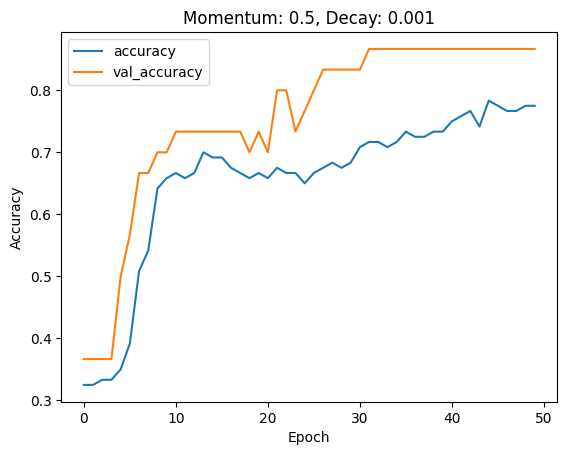

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3646 - loss: 1.1109 - val_accuracy: 0.3333 - val_loss: 1.1210
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3240 - loss: 1.1162 - val_accuracy: 0.3333 - val_loss: 1.1160
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3375 - loss: 1.1070 - val_accuracy: 0.3333 - val_loss: 1.1117
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3563 - loss: 1.1026 - val_accuracy: 0.3333 - val_loss: 1.1076
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3540 - loss: 1.0967 - val_accuracy: 0.3333 - val_loss: 1.1037
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3383 - loss: 1.0971 - val_accuracy: 0.3333 - val_loss: 1.1000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3585 - loss: 1.0935 - val_accuracy: 0.3333 - val_loss: 1.0964
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3440 - loss: 1.0895 - val_accuracy: 0.3333 - val_loss: 1.0929

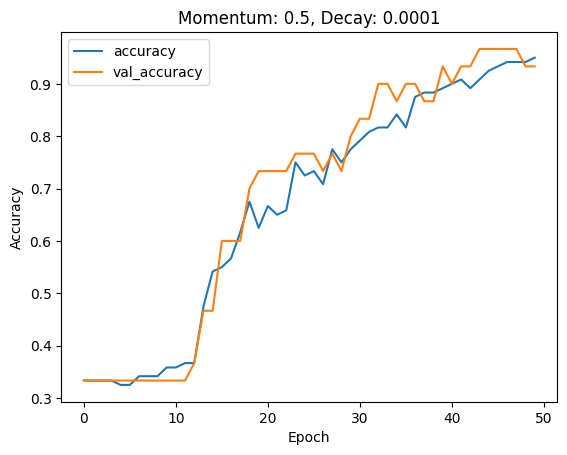

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3383 - loss: 1.1486 - val_accuracy: 0.3667 - val_loss: 1.1030
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3019 - loss: 1.1251 - val_accuracy: 0.3667 - val_loss: 1.0534
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3752 - loss: 1.0615 - val_accuracy: 0.6000 - val_loss: 1.0332
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5406 - loss: 1.0475 - val_accuracy: 0.6333 - val_loss: 1.0117
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6223 - loss: 1.0248 - val_accuracy: 0.7000 - val_loss: 0.9881
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5923 - loss: 1.0148 - val_accuracy: 0.7000 - val_loss: 0.9622
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6246 - loss: 0.9791 - val_accuracy: 0.7000 - val_loss: 0.9339
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6217 - loss: 0.9637 - val_accuracy: 0.7000 - val_loss: 0.9069


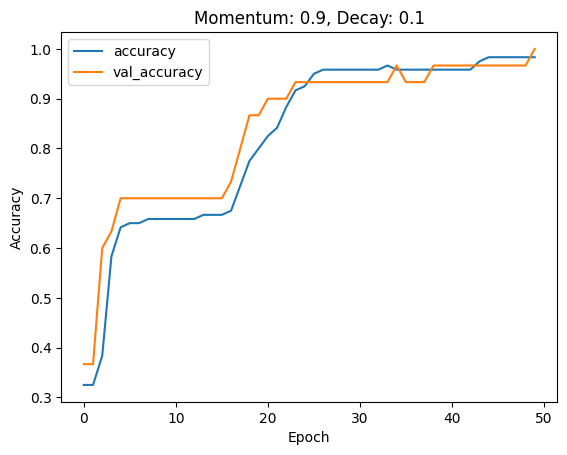

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3377 - loss: 1.1002 - val_accuracy: 0.3000 - val_loss: 1.0962
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3721 - loss: 1.0683 - val_accuracy: 0.3000 - val_loss: 1.0582
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4023 - loss: 1.0493 - val_accuracy: 0.3667 - val_loss: 1.0195
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3354 - loss: 1.0376 - val_accuracy: 0.4000 - val_loss: 0.9846
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4129 - loss: 0.9959 - val_accuracy: 0.5667 - val_loss: 0.9551
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5373 - loss: 0.9785 - val_accuracy: 0.6333 - val_loss: 0.9259
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6302 - loss: 0.9388 - val_accuracy: 0.6667 - val_loss: 0.8950
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6842 - loss: 0.9011 - val_accuracy: 0.6667 - val_loss: 0.8596

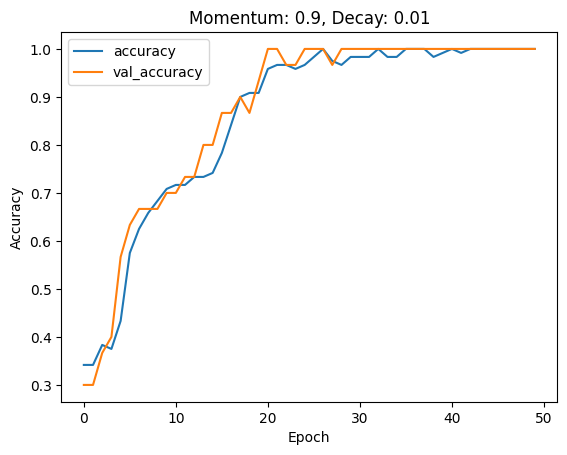

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3250 - loss: 1.1929 - val_accuracy: 0.3333 - val_loss: 1.1906
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3702 - loss: 1.1276 - val_accuracy: 0.3667 - val_loss: 1.1142
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4279 - loss: 1.0846 - val_accuracy: 0.5667 - val_loss: 1.0716
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6463 - loss: 1.0404 - val_accuracy: 0.6333 - val_loss: 1.0397
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6927 - loss: 1.0074 - val_accuracy: 0.6333 - val_loss: 1.0102
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6940 - loss: 0.9923 - val_accuracy: 0.6333 - val_loss: 0.9816
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6729 - loss: 0.9611 - val_accuracy: 0.6333 - val_loss: 0.9494
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5637 - loss: 0.9537 - val_accuracy: 0.7667 - val_loss: 0.9187


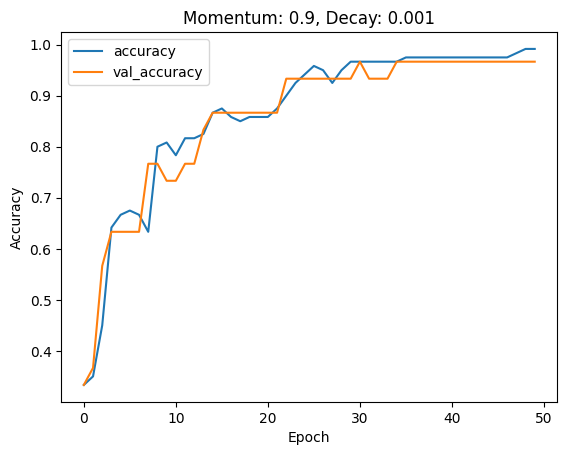

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.2908 - loss: 1.0912 - val_accuracy: 0.3000 - val_loss: 1.0698
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3804 - loss: 1.0548 - val_accuracy: 0.3000 - val_loss: 1.0442
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3567 - loss: 1.0355 - val_accuracy: 0.4667 - val_loss: 1.0098
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5094 - loss: 1.0064 - val_accuracy: 0.7333 - val_loss: 0.9739
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7163 - loss: 0.9741 - val_accuracy: 0.8000 - val_loss: 0.9348
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7392 - loss: 0.9321 - val_accuracy: 0.7667 - val_loss: 0.9003
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6856 - loss: 0.9047 - val_accuracy: 0.7667 - val_loss: 0.8652
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6892 - loss: 0.8788 - val_accuracy: 0.7667 - val_loss: 0.8271


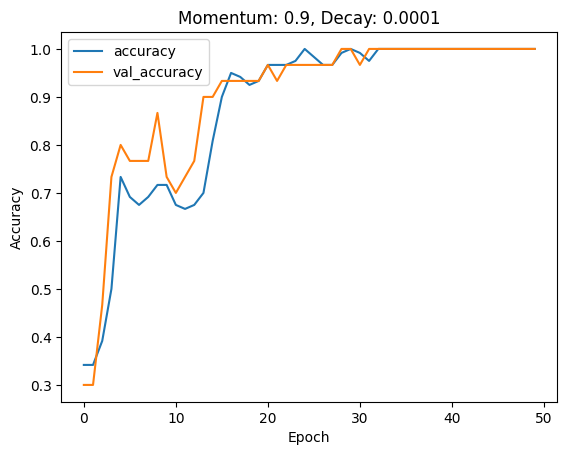

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3290 - loss: 1.0398 - val_accuracy: 0.3667 - val_loss: 0.9990
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3123 - loss: 1.0304 - val_accuracy: 0.3667 - val_loss: 0.9778
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4013 - loss: 0.9849 - val_accuracy: 0.6000 - val_loss: 0.9502
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6708 - loss: 0.9638 - val_accuracy: 1.0000 - val_loss: 0.9198
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9615 - loss: 0.9292 - val_accuracy: 0.9667 - val_loss: 0.8819
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9392 - loss: 0.8867 - val_accuracy: 1.0000 - val_loss: 0.8153
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9431 - loss: 0.8213 - val_accuracy: 0.9000 - val_loss: 0.7242
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7937 - loss: 0.7313 - val_accuracy: 0.7000 - val_loss: 0.6345


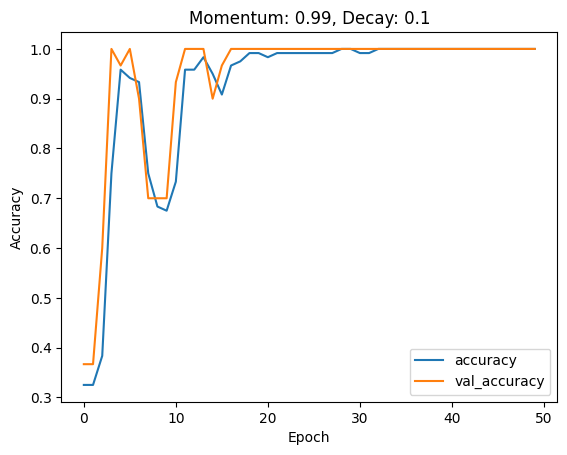

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3419 - loss: 1.1349 - val_accuracy: 0.3000 - val_loss: 1.1300
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3123 - loss: 1.1288 - val_accuracy: 0.2667 - val_loss: 1.1025
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2771 - loss: 1.0979 - val_accuracy: 0.3000 - val_loss: 1.0691
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2485 - loss: 1.0690 - val_accuracy: 0.5333 - val_loss: 1.0345
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6035 - loss: 1.0359 - val_accuracy: 0.7000 - val_loss: 0.9984
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6425 - loss: 1.0002 - val_accuracy: 0.7000 - val_loss: 0.9525
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6956 - loss: 0.9474 - val_accuracy: 0.7000 - val_loss: 0.8925
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6404 - loss: 0.8979 - val_accuracy: 0.7000 - val_loss: 0.8242


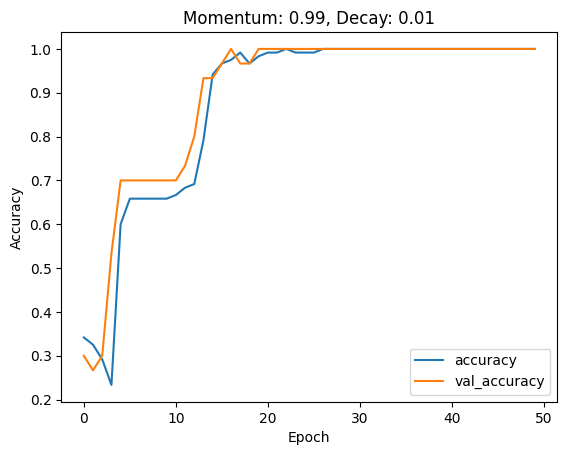

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1575 - loss: 1.1535 - val_accuracy: 0.2000 - val_loss: 1.1405
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3048 - loss: 1.1162 - val_accuracy: 0.3667 - val_loss: 1.0770
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4777 - loss: 1.0544 - val_accuracy: 0.7000 - val_loss: 0.9830
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6625 - loss: 0.9742 - val_accuracy: 0.7667 - val_loss: 0.9235
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6585 - loss: 0.9271 - val_accuracy: 0.8667 - val_loss: 0.8613
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8090 - loss: 0.8595 - val_accuracy: 0.9333 - val_loss: 0.7598
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8185 - loss: 0.7641 - val_accuracy: 0.7333 - val_loss: 0.6697
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7625 - loss: 0.6507 - val_accuracy: 0.7000 - val_loss: 0.5890


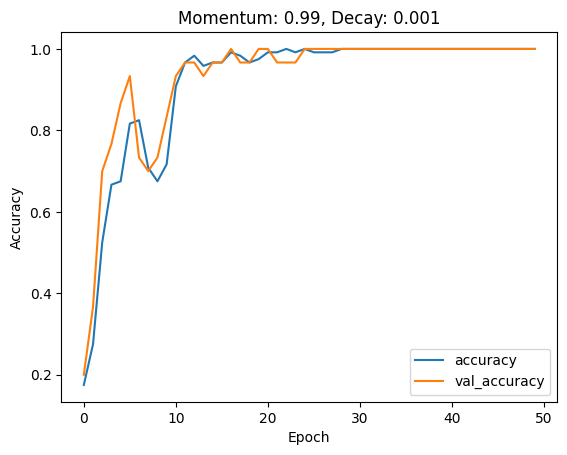

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3146 - loss: 1.1142 - val_accuracy: 0.3333 - val_loss: 1.1127
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3129 - loss: 1.1072 - val_accuracy: 0.4333 - val_loss: 1.0935
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5129 - loss: 1.0814 - val_accuracy: 0.6333 - val_loss: 1.0747
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6521 - loss: 1.0695 - val_accuracy: 0.6333 - val_loss: 1.0659
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6802 - loss: 1.0506 - val_accuracy: 0.6333 - val_loss: 1.0302
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6888 - loss: 1.0118 - val_accuracy: 0.6000 - val_loss: 0.9697
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6158 - loss: 0.9481 - val_accuracy: 0.5000 - val_loss: 0.9020
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5481 - loss: 0.8837 - val_accuracy: 0.5667 - val_loss: 0.8213


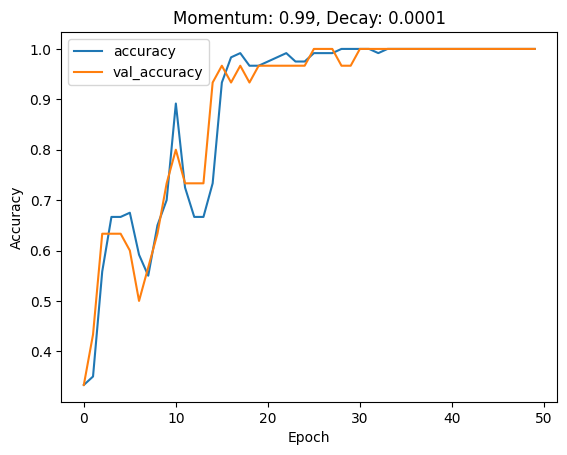

Best Results - Momentum: 0.9, Decay: 0.1, Accuracy: 1.0


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

best_learning_rate = 0.01
momentum_values = [0.0, 0.5, 0.9, 0.99]
decay_values = [1E-1, 1E-2, 1E-3, 1E-4]

best_results = {}

for momentum in momentum_values:
    for decay in decay_values:
        model = keras.Sequential([
            layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
            layers.Dense(8, activation='relu'),
            layers.Dense(3, activation='softmax')
        ])

        model.compile(optimizer=keras.optimizers.SGD(learning_rate=best_learning_rate, momentum=momentum, decay=decay),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

        final_val_accuracy = history.history['val_accuracy'][-1]
        best_results[(momentum, decay)] = final_val_accuracy

        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Momentum: {momentum}, Decay: {decay}')
        plt.legend()
        plt.show()

best_momentum_decay = max(best_results, key=best_results.get)
print(f'Best Results - Momentum: {best_momentum_decay[0]}, Decay: {best_momentum_decay[1]}, Accuracy: {best_results[best_momentum_decay]}')

Best validation accuracy: 1.0 with Momentum: 0.9 and Decay: 0.1

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3500 - loss: 0.9790 - val_accuracy: 0.3667 - val_loss: 0.9538
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3904 - loss: 0.9774 - val_accuracy: 0.5000 - val_loss: 0.9411
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5246 - loss: 0.9627 - val_accuracy: 0.6000 - val_loss: 0.9303
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5760 - loss: 0.9655 - val_accuracy: 0.6000 - val_loss: 0.9204
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6129 - loss: 0.9679 - val_accuracy: 0.6333 - val_loss: 0.9110
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6798 - loss: 0.9293 - val_accuracy: 0.6667 - val_loss: 0.9028
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6529 - loss: 0.9383 - val_accuracy: 0.7000 - val_loss: 0.8946
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6540 - loss: 0.9410 - val_accuracy: 0.7000 - val_loss: 0.8870


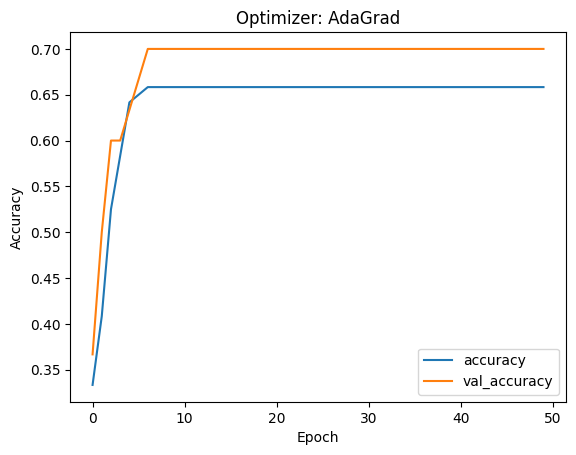

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.3363 - loss: 1.0909 - val_accuracy: 0.5667 - val_loss: 1.0238
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5115 - loss: 1.0066 - val_accuracy: 0.6000 - val_loss: 0.9622
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5025 - loss: 0.9272 - val_accuracy: 0.6333 - val_loss: 0.8986
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6898 - loss: 0.8680 - val_accuracy: 0.8667 - val_loss: 0.7961
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8467 - loss: 0.7665 - val_accuracy: 0.8667 - val_loss: 0.6824
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7990 - loss: 0.6420 - val_accuracy: 0.9000 - val_loss: 0.5895
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8044 - loss: 0.5715 - val_accuracy: 0.8000 - val_loss: 0.5287
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8521 - loss: 0.4981 - val_accuracy: 0.9667 - val_loss: 0.4771

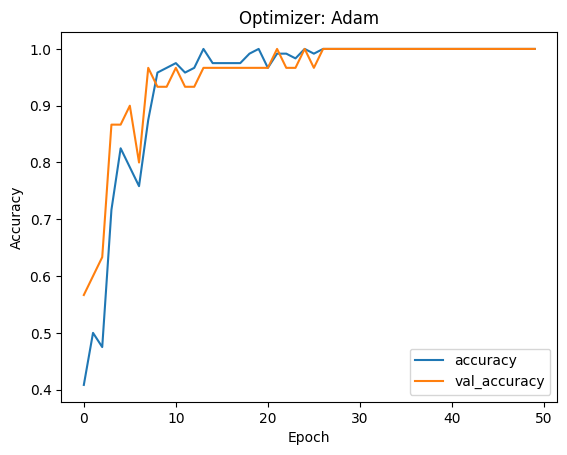

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3625 - loss: 0.9924 - val_accuracy: 0.7000 - val_loss: 0.8538
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5454 - loss: 0.9129 - val_accuracy: 0.7000 - val_loss: 0.7764
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6554 - loss: 0.7899 - val_accuracy: 0.7000 - val_loss: 0.6935
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6981 - loss: 0.7014 - val_accuracy: 0.7000 - val_loss: 0.6041
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7515 - loss: 0.6174 - val_accuracy: 0.7000 - val_loss: 0.5277
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7773 - loss: 0.5399 - val_accuracy: 0.7000 - val_loss: 0.4732
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7792 - loss: 0.4796 - val_accuracy: 0.9667 - val_loss: 0.4316
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8796 - loss: 0.4436 - val_accuracy: 0.6667 - val_loss: 0.4755


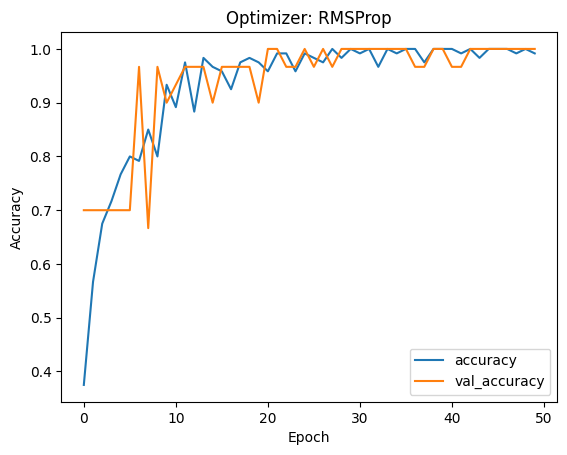

Best validation accuracy: 1.0 with Optimizer: Adam


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

best_learning_rate = 0.01
optimizers = {
    'AdaGrad': keras.optimizers.Adagrad(learning_rate=best_learning_rate),
    'Adam': keras.optimizers.Adam(learning_rate=best_learning_rate),
    'RMSProp': keras.optimizers.RMSprop(learning_rate=best_learning_rate)
}

best_results = {}

for optimizer_name, optimizer in optimizers.items():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Optimizer: {optimizer_name}')
    plt.legend()
    plt.show()

    final_val_accuracy = history.history['val_accuracy'][-1]
    best_results[optimizer_name] = final_val_accuracy

best_optimizer = max(best_results, key=best_results.get)
print(f"Best validation accuracy: {best_results[best_optimizer]} with Optimizer: {best_optimizer}")

step 10


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = pd.read_csv('/content/seeds.csv')

print(data.head())
print(data.columns)


    AREA  PERIMETER  COMPACTNESS  LENGTH  WIDTH  ASSYMMETRY_COEFFICIENT  \
0  15.26      14.84       0.8710   5.763  3.312                   2.221   
1  14.88      14.57       0.8811   5.554  3.333                   1.018   
2  14.29      14.09       0.9050   5.291  3.337                   2.699   
3  13.84      13.94       0.8955   5.324  3.379                   2.259   
4  16.14      14.99       0.9034   5.658  3.562                   1.355   

   GROOVE_LENGTH  TYPE  
0          5.220     1  
1          4.956     1  
2          4.825     1  
3          4.805     1  
4          5.175     1  
Index(['AREA', 'PERIMETER', 'COMPACTNESS', 'LENGTH', 'WIDTH',
       'ASSYMMETRY_COEFFICIENT', 'GROOVE_LENGTH', 'TYPE'],
      dtype='object')


In [59]:
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(data[['TYPE']])
species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['TYPE']))

data = pd.concat([data.drop('TYPE', axis=1), species_df], axis=1)

x = data.drop(species_df.columns, axis=1)
y = species_encoded

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

num_classes = y.shape[1]

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

model.summary()

x_train shape: (112, 7)
y_train shape: (112, 2)
x_val shape: (28, 7)
y_val shape: (28, 2)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5010 - loss: 0.6929 - val_accuracy: 0.5714 - val_loss: 0.6928
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5702 - loss: 0.6928 - val_accuracy: 0.5714 - val_loss: 0.6928
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5292 - loss: 0.6927 - val_accuracy: 0.5714 - val_loss: 0.6928
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5793 - loss: 0.6927 - val_accuracy: 0.5714 - val_loss: 0.6927
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6298 - loss: 0.6927 - val_accuracy: 0.6071 - val_loss: 0.6926
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6409 - loss: 0.6924 - val_accuracy: 0.6071 - val_loss: 0.6926
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5312 - loss: 0.6925 - val_accuracy: 0.6071 - val_loss: 0.6925
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6542 - loss: 0.6923 - val_accuracy: 0.6071 - val_loss: 0.6924
Epoch 9/50


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_267 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284 (1.11 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

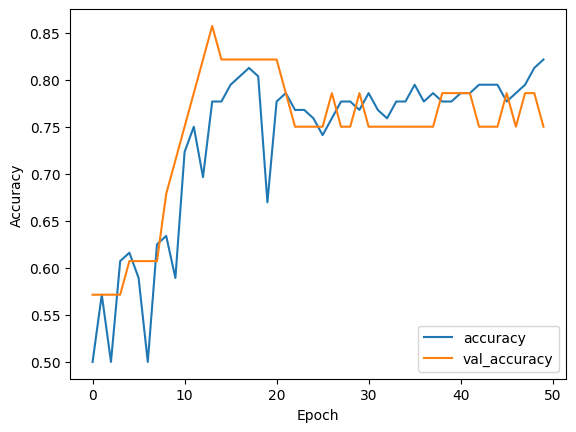

In [61]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training model with learning rate: 0.1
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5051 - loss: 0.6469 - val_accuracy: 0.5000 - val_loss: 0.6044
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5338 - loss: 0.6250 - val_accuracy: 0.6786 - val_loss: 0.5752
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6158 - loss: 0.5843 - val_accuracy: 0.8571 - val_loss: 0.5483
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7182 - loss: 0.5591 - val_accuracy: 0.8929 - val_loss: 0.5216
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8329 - loss: 0.5352 - val_accuracy: 0.9643 - val_loss: 0.4986
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8979 - loss: 0.5098 - val_accuracy: 0.9286 - val_loss: 0.4611
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9199 - loss: 0.4781 - val_accuracy: 0.9286 - val_loss: 0.4293
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9266 - loss: 0.4642 - v

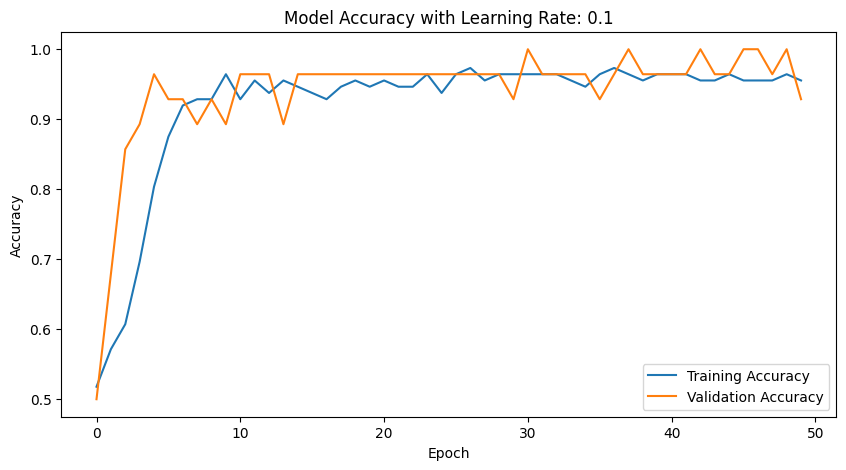

Training model with learning rate: 0.01
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4841 - loss: 0.7319 - val_accuracy: 0.4286 - val_loss: 0.7296
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4868 - loss: 0.7213 - val_accuracy: 0.4286 - val_loss: 0.7209
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4210 - loss: 0.7198 - val_accuracy: 0.4286 - val_loss: 0.7127
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3988 - loss: 0.7100 - val_accuracy: 0.3571 - val_loss: 0.7050
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3533 - loss: 0.7047 - val_accuracy: 0.4286 - val_loss: 0.6983
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3970 - loss: 0.6985 - val_accuracy: 0.5357 - val_loss: 0.6922
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5616 - loss: 0.6921 - val_accuracy: 0.5714 - val_loss: 0.6870
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5749 - loss: 0.6861 - 

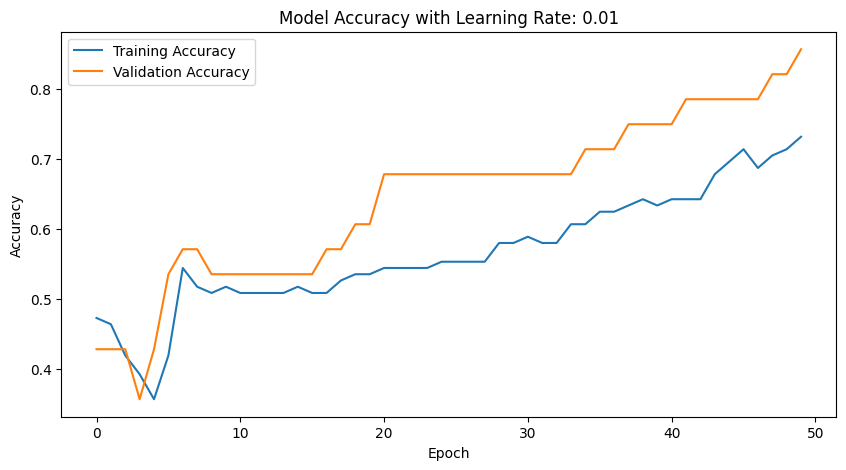

Training model with learning rate: 0.001
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5000 - loss: 1.1792 - val_accuracy: 0.5000 - val_loss: 1.2225
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5021 - loss: 1.1910 - val_accuracy: 0.5000 - val_loss: 1.2108
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5240 - loss: 1.1340 - val_accuracy: 0.5000 - val_loss: 1.1995
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5010 - loss: 1.1626 - val_accuracy: 0.5000 - val_loss: 1.1892
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5177 - loss: 1.1332 - val_accuracy: 0.5000 - val_loss: 1.1779
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5219 - loss: 1.1124 - val_accuracy: 0.5000 - val_loss: 1.1672
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.0721 - val_accuracy: 0.5000 - val_loss: 1.1574
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4708 - loss: 1.1639 -

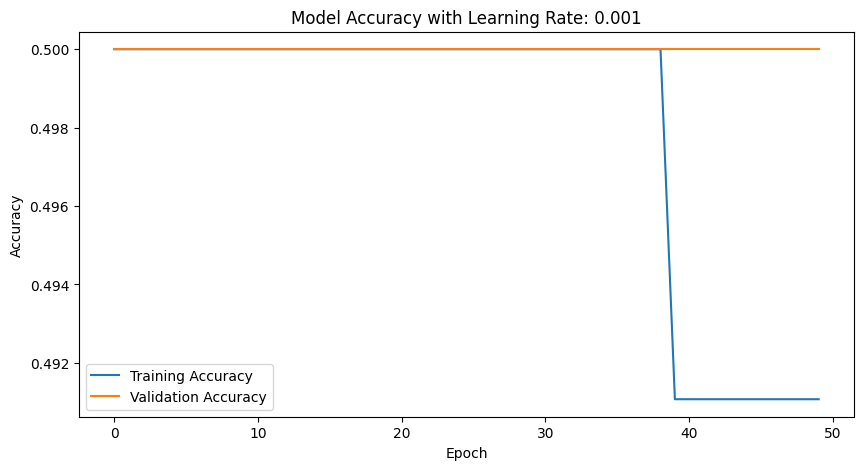

Training model with learning rate: 0.0001
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5052 - loss: 0.6740 - val_accuracy: 0.5000 - val_loss: 0.6304
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4948 - loss: 0.6843 - val_accuracy: 0.5000 - val_loss: 0.6303
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4719 - loss: 0.6896 - val_accuracy: 0.5000 - val_loss: 0.6302
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5365 - loss: 0.6409 - val_accuracy: 0.5000 - val_loss: 0.6301
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4740 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6300
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6750 - val_accuracy: 0.5000 - val_loss: 0.6300
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4729 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6299
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5010 - loss: 0.6769 

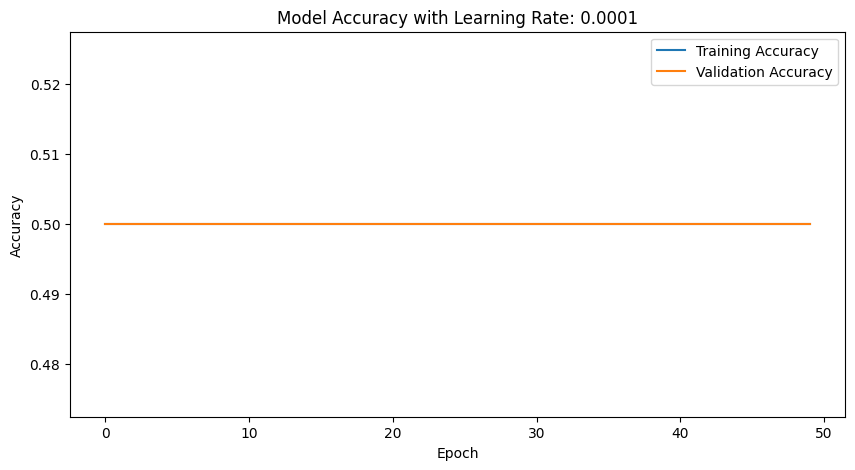

In [66]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")

    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Model Accuracy with Learning Rate: {lr}')
    plt.legend()
    plt.show()

best learnign rate wit highest accuracy is 0.1


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4546 - loss: 0.9125 - val_accuracy: 0.5714 - val_loss: 0.6430
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5253 - loss: 0.6484 - val_accuracy: 0.7500 - val_loss: 0.5847
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6734 - loss: 0.6121 - val_accuracy: 0.7857 - val_loss: 0.5398
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7497 - loss: 0.5555 - val_accuracy: 0.9286 - val_loss: 0.5032
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8138 - loss: 0.5155 - val_accuracy: 0.9286 - val_loss: 0.4714
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8734 - loss: 0.4872 - val_accuracy: 0.9286 - val_loss: 0.4249
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8549 - loss: 0.4646 - val_accuracy: 0.9286 - val_loss: 0.3906
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9341 - loss: 0.4061 - val_accuracy: 0.9286 - val_loss: 0.3571


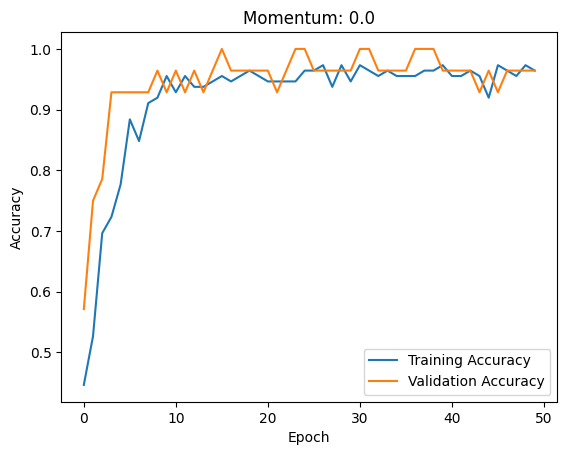

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4765 - loss: 0.6902 - val_accuracy: 0.6071 - val_loss: 0.6084
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5810 - loss: 0.6160 - val_accuracy: 0.8929 - val_loss: 0.5707
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8759 - loss: 0.5889 - val_accuracy: 0.8929 - val_loss: 0.5200
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7321 - loss: 0.5437 - val_accuracy: 0.9286 - val_loss: 0.4787
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8871 - loss: 0.4928 - val_accuracy: 0.8929 - val_loss: 0.4410
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9168 - loss: 0.4534 - val_accuracy: 0.9286 - val_loss: 0.3762
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9168 - loss: 0.4300 - val_accuracy: 0.8929 - val_loss: 0.3383
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9339 - loss: 0.3634 - val_accuracy: 0.9286 - val_loss: 0.3199

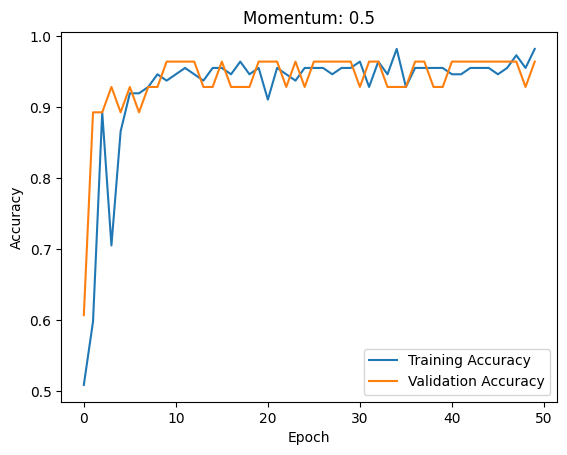

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5021 - loss: 0.6598 - val_accuracy: 0.6071 - val_loss: 0.6204
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5723 - loss: 0.6128 - val_accuracy: 0.8929 - val_loss: 0.5396
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8655 - loss: 0.5463 - val_accuracy: 0.8929 - val_loss: 0.4129
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9318 - loss: 0.4285 - val_accuracy: 0.9643 - val_loss: 0.2803
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9442 - loss: 0.2897 - val_accuracy: 0.9286 - val_loss: 0.2079
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9604 - loss: 0.2111 - val_accuracy: 0.9643 - val_loss: 0.1450
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9490 - loss: 0.1741 - val_accuracy: 0.9643 - val_loss: 0.1068
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9524 - loss: 0.1577 - val_accuracy: 0.9286 - val_loss: 0.1054


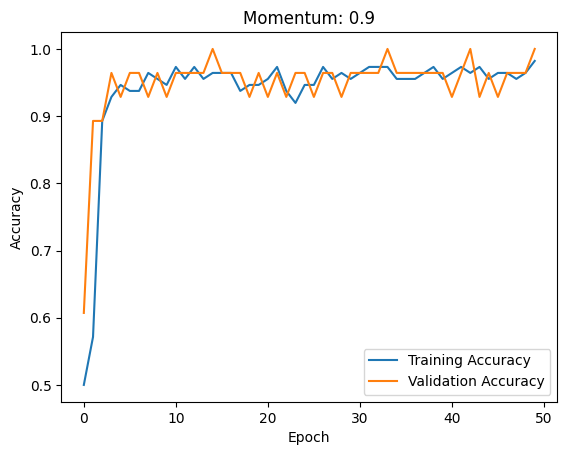

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4982 - loss: 0.6686 - val_accuracy: 0.7143 - val_loss: 0.6333
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7027 - loss: 0.6268 - val_accuracy: 0.9286 - val_loss: 0.5345
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8467 - loss: 0.5220 - val_accuracy: 0.9643 - val_loss: 0.3497
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9728 - loss: 0.3387 - val_accuracy: 0.9643 - val_loss: 0.1531
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9500 - loss: 0.1887 - val_accuracy: 0.9286 - val_loss: 0.1172
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9379 - loss: 0.2127 - val_accuracy: 0.9643 - val_loss: 0.1245
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9223 - loss: 0.3276 - val_accuracy: 0.9286 - val_loss: 0.0866
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9463 - loss: 0.2700 - val_accuracy: 0.8929 - val_loss: 1.2769


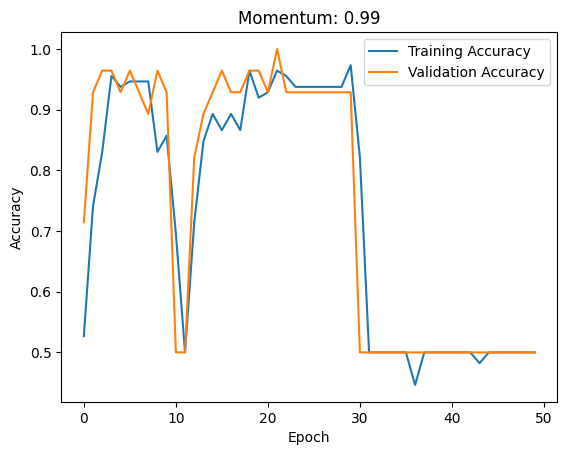

In [69]:
best_learning_rate = 0.1
momentum_values = [0.0, 0.5, 0.9, 0.99]

for momentum in momentum_values:
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=best_learning_rate, momentum=momentum),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Momentum: {momentum}')
    plt.legend()
    plt.show()

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5254 - loss: 0.6481 - val_accuracy: 0.5357 - val_loss: 0.5993
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5711 - loss: 0.6092 - val_accuracy: 0.6786 - val_loss: 0.5682
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6652 - loss: 0.5717 - val_accuracy: 0.9286 - val_loss: 0.5378
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8432 - loss: 0.5458 - val_accuracy: 0.9643 - val_loss: 0.5088
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8982 - loss: 0.5241 - val_accuracy: 0.9286 - val_loss: 0.4702
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9097 - loss: 0.4918 - val_accuracy: 0.9643 - val_loss: 0.4430
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9198 - loss: 0.4767 - val_accuracy: 0.9286 - val_loss: 0.4040
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9118 - loss: 0.4432 - val_accuracy: 0.9286 - val_loss: 0.3733


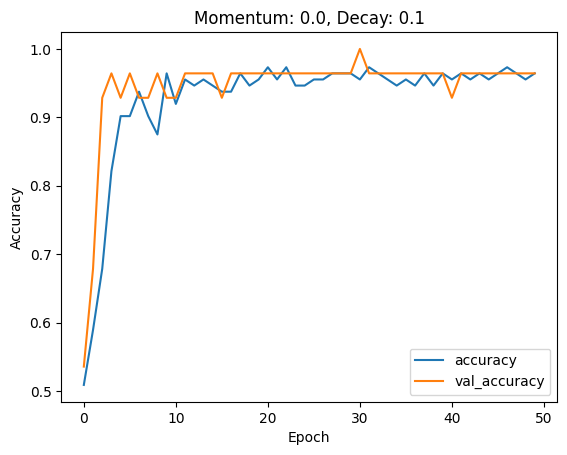

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5644 - loss: 0.6748 - val_accuracy: 0.7143 - val_loss: 0.6135
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6347 - loss: 0.6192 - val_accuracy: 0.7500 - val_loss: 0.5714
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7469 - loss: 0.5952 - val_accuracy: 0.7857 - val_loss: 0.5327
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7150 - loss: 0.5729 - val_accuracy: 0.7857 - val_loss: 0.4971
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7638 - loss: 0.5136 - val_accuracy: 0.8571 - val_loss: 0.4627
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8275 - loss: 0.4781 - val_accuracy: 0.9643 - val_loss: 0.4357
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8966 - loss: 0.4812 - val_accuracy: 0.8214 - val_loss: 0.4088
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8024 - loss: 0.4489 - val_accuracy: 0.9643 - val_loss: 0.3775


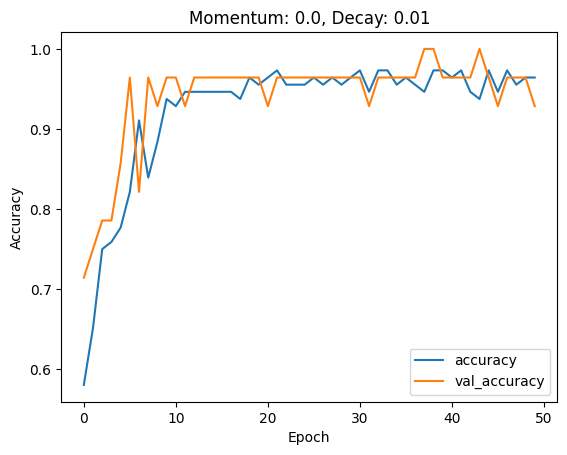

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4958 - loss: 0.8303 - val_accuracy: 0.4286 - val_loss: 0.7225
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4533 - loss: 0.7141 - val_accuracy: 0.3929 - val_loss: 0.7024
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3844 - loss: 0.7028 - val_accuracy: 0.3929 - val_loss: 0.6891
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4167 - loss: 0.6926 - val_accuracy: 0.7500 - val_loss: 0.6667
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6243 - loss: 0.6813 - val_accuracy: 0.7857 - val_loss: 0.6503
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7375 - loss: 0.6661 - val_accuracy: 0.8571 - val_loss: 0.6358
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7741 - loss: 0.6525 - val_accuracy: 0.7857 - val_loss: 0.6260
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7801 - loss: 0.6390 - val_accuracy: 0.8214 - val_loss: 0.6095


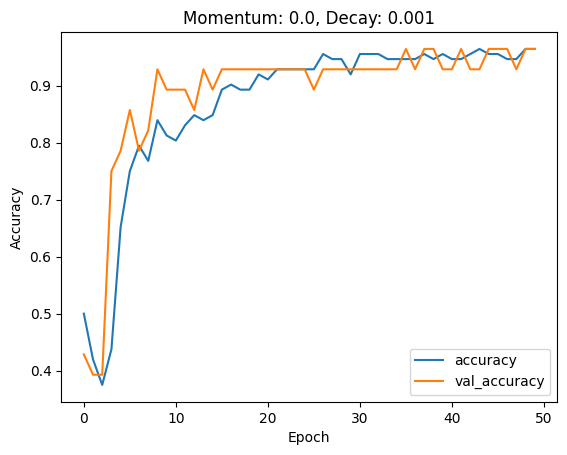

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4933 - loss: 0.6971 - val_accuracy: 0.6429 - val_loss: 0.6787
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6451 - loss: 0.6817 - val_accuracy: 0.6786 - val_loss: 0.6652
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6177 - loss: 0.6665 - val_accuracy: 0.7500 - val_loss: 0.6557
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8137 - loss: 0.6594 - val_accuracy: 0.7857 - val_loss: 0.6450
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7274 - loss: 0.6486 - val_accuracy: 0.8214 - val_loss: 0.6330
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8219 - loss: 0.6425 - val_accuracy: 0.8214 - val_loss: 0.6191
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8190 - loss: 0.6330 - val_accuracy: 0.8214 - val_loss: 0.6037
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7810 - loss: 0.6173 - val_accuracy: 0.8571 - val_loss: 0.5855


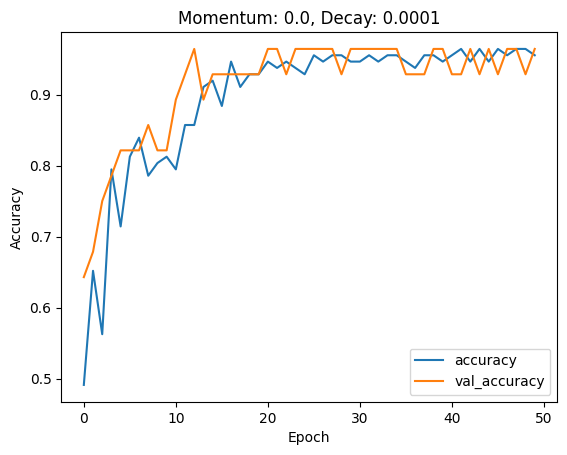

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6598 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6565
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5083 - loss: 0.6566 - val_accuracy: 0.5714 - val_loss: 0.6157
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5635 - loss: 0.6125 - val_accuracy: 0.7857 - val_loss: 0.5717
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7923 - loss: 0.5798 - val_accuracy: 0.9286 - val_loss: 0.5309
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8899 - loss: 0.5460 - val_accuracy: 0.9286 - val_loss: 0.4767
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8216 - loss: 0.4864 - val_accuracy: 0.9643 - val_loss: 0.4283
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9583 - loss: 0.4463 - val_accuracy: 0.9643 - val_loss: 0.3760
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9537 - loss: 0.3913 - val_accuracy: 0.9286 - val_loss: 0.3161


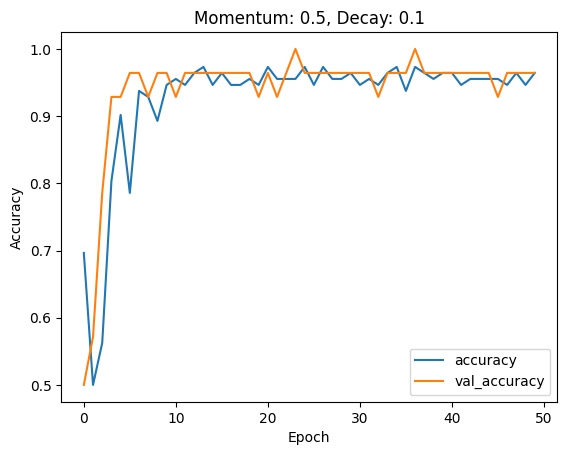

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4888 - loss: 0.7426 - val_accuracy: 0.1429 - val_loss: 0.7111
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2333 - loss: 0.7059 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5063 - loss: 0.6968 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5052 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5104 - loss: 0.6916 - val_accuracy: 0.6429 - val_loss: 0.6906
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5789 - loss: 0.6909 - val_accuracy: 0.7143 - val_loss: 0.6879
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7018 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6832
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4958 - loss: 0.6835 - val_accuracy: 0.5357 - val_loss: 0.6756


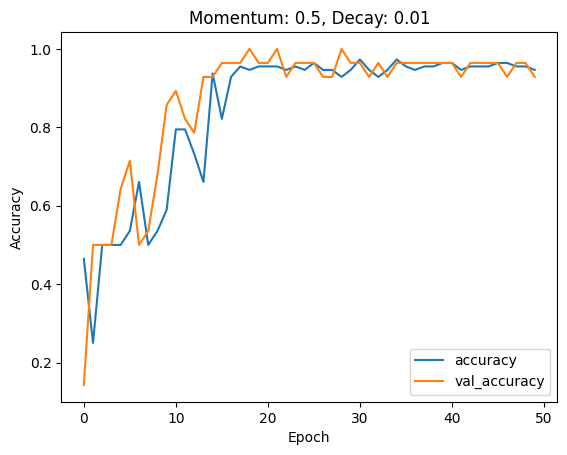

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5243 - loss: 0.6701 - val_accuracy: 0.5000 - val_loss: 0.6509
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5814 - loss: 0.6540 - val_accuracy: 0.6071 - val_loss: 0.6238
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6045 - loss: 0.6255 - val_accuracy: 0.6786 - val_loss: 0.5935
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6902 - loss: 0.5977 - val_accuracy: 0.8571 - val_loss: 0.5563
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7702 - loss: 0.5712 - val_accuracy: 0.9286 - val_loss: 0.5116
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7655 - loss: 0.5246 - val_accuracy: 0.9286 - val_loss: 0.4650
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8940 - loss: 0.4799 - val_accuracy: 0.9286 - val_loss: 0.4140
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9330 - loss: 0.4330 - val_accuracy: 0.9286 - val_loss: 0.3639


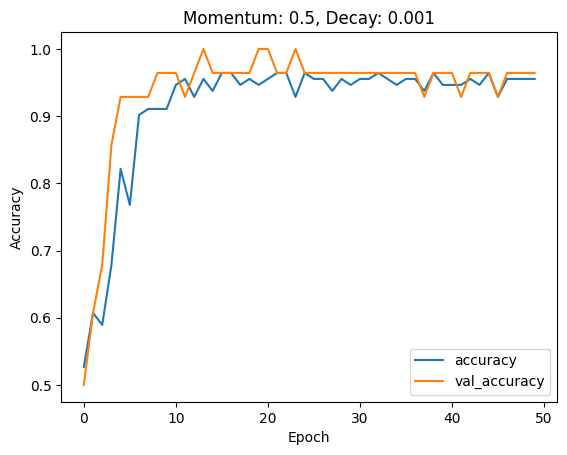

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4696 - loss: 0.8180 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.6778 - val_accuracy: 0.5000 - val_loss: 0.6438
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5365 - loss: 0.6377 - val_accuracy: 0.8929 - val_loss: 0.6069
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8402 - loss: 0.6052 - val_accuracy: 0.9286 - val_loss: 0.5573
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9076 - loss: 0.5532 - val_accuracy: 0.9286 - val_loss: 0.4950
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9185 - loss: 0.5029 - val_accuracy: 1.0000 - val_loss: 0.4369
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9345 - loss: 0.4461 - val_accuracy: 1.0000 - val_loss: 0.3708
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9665 - loss: 0.3899 - val_accuracy: 0.9643 - val_loss: 0.2896


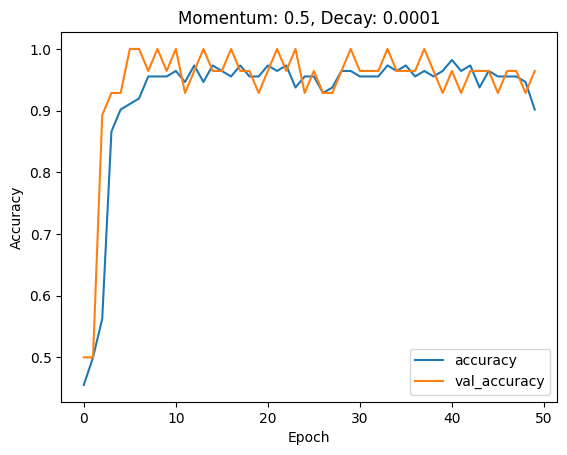

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4946 - loss: 0.6873 - val_accuracy: 0.5714 - val_loss: 0.6339
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5554 - loss: 0.6319 - val_accuracy: 0.8571 - val_loss: 0.5441
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8016 - loss: 0.5305 - val_accuracy: 0.9286 - val_loss: 0.4094
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9375 - loss: 0.3961 - val_accuracy: 0.9286 - val_loss: 0.2541
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9204 - loss: 0.2843 - val_accuracy: 0.9286 - val_loss: 0.1654
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9452 - loss: 0.1902 - val_accuracy: 0.9286 - val_loss: 0.1295
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9272 - loss: 0.2013 - val_accuracy: 0.9286 - val_loss: 0.1732
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9161 - loss: 0.2394 - val_accuracy: 0.9286 - val_loss: 0.0966


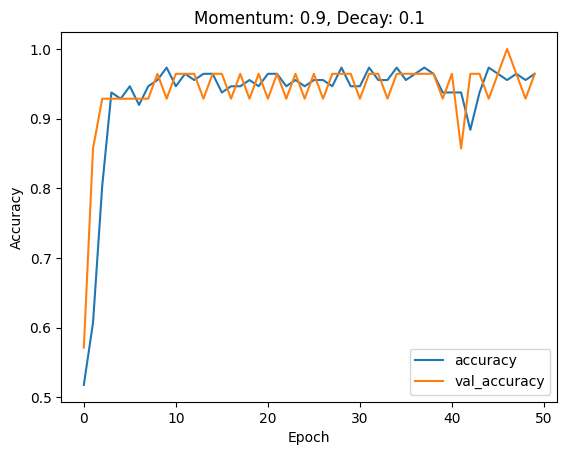

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.4567 - loss: 0.6966 - val_accuracy: 0.6071 - val_loss: 0.6875
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5940 - loss: 0.6842 - val_accuracy: 0.7500 - val_loss: 0.6687
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7720 - loss: 0.6679 - val_accuracy: 0.7143 - val_loss: 0.6391
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7324 - loss: 0.6387 - val_accuracy: 0.9286 - val_loss: 0.5846
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8717 - loss: 0.5849 - val_accuracy: 0.8929 - val_loss: 0.4947
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8784 - loss: 0.4994 - val_accuracy: 1.0000 - val_loss: 0.3676
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9426 - loss: 0.3807 - val_accuracy: 0.9643 - val_loss: 0.2469
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9670 - loss: 0.2719 - val_accuracy: 0.9643 - val_loss: 0.1540

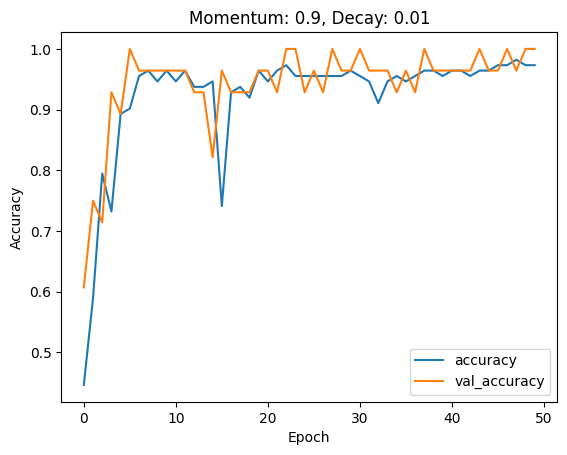

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6317 - loss: 0.6597 - val_accuracy: 0.7500 - val_loss: 0.5782
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6488 - loss: 0.5888 - val_accuracy: 0.8571 - val_loss: 0.4754
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7897 - loss: 0.4743 - val_accuracy: 0.9643 - val_loss: 0.3447
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9519 - loss: 0.3739 - val_accuracy: 0.9643 - val_loss: 0.2197
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9281 - loss: 0.2671 - val_accuracy: 0.9643 - val_loss: 0.1450
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9379 - loss: 0.1978 - val_accuracy: 0.9643 - val_loss: 0.1081
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9618 - loss: 0.1431 - val_accuracy: 0.9643 - val_loss: 0.0960
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9379 - loss: 0.1740 - val_accuracy: 1.0000 - val_loss: 0.0799


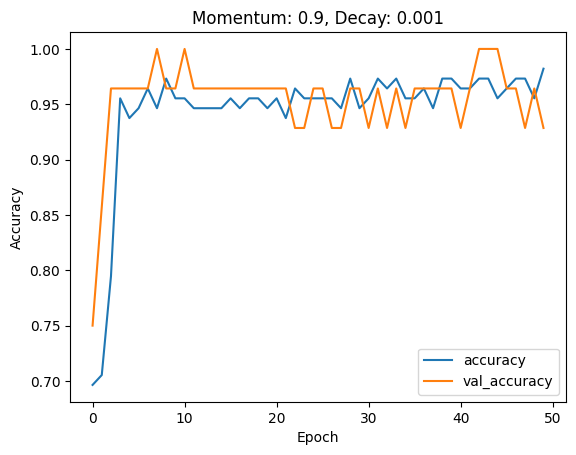

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6054 - loss: 0.6205 - val_accuracy: 0.9643 - val_loss: 0.5186
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8850 - loss: 0.5078 - val_accuracy: 0.9286 - val_loss: 0.3503
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9417 - loss: 0.3447 - val_accuracy: 0.9643 - val_loss: 0.2375
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9619 - loss: 0.2428 - val_accuracy: 0.9643 - val_loss: 0.1580
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9436 - loss: 0.2026 - val_accuracy: 0.9643 - val_loss: 0.1177
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9499 - loss: 0.1433 - val_accuracy: 0.9643 - val_loss: 0.1149
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9317 - loss: 0.1743 - val_accuracy: 0.9286 - val_loss: 0.1003
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9649 - loss: 0.1431 - val_accuracy: 0.9643 - val_loss: 0.0826


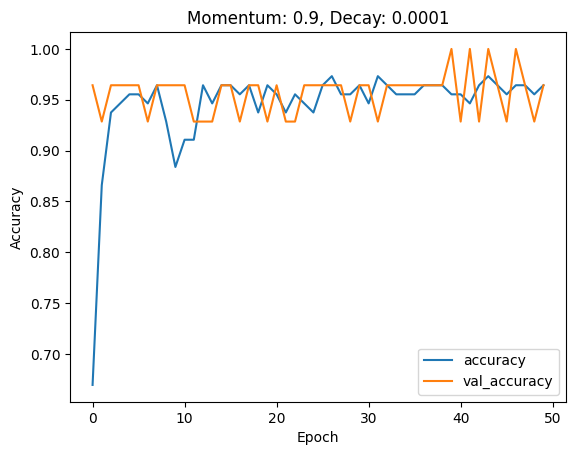

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7442 - loss: 0.6717 - val_accuracy: 0.6786 - val_loss: 0.6251
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5789 - loss: 0.6201 - val_accuracy: 0.5714 - val_loss: 0.5498
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6754 - loss: 0.5168 - val_accuracy: 1.0000 - val_loss: 0.3932
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9613 - loss: 0.3802 - val_accuracy: 0.9643 - val_loss: 0.1805
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9256 - loss: 0.2048 - val_accuracy: 0.9643 - val_loss: 0.0934
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9618 - loss: 0.1488 - val_accuracy: 0.9643 - val_loss: 0.0770
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9670 - loss: 0.1402 - val_accuracy: 0.9643 - val_loss: 0.0448
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9525 - loss: 0.1709 - val_accuracy: 0.9286 - val_loss: 0.3824


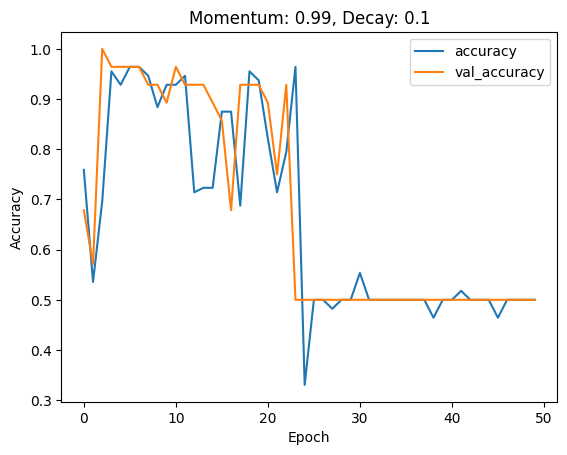

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3768 - loss: 0.7232 - val_accuracy: 0.6071 - val_loss: 0.6672
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4979 - loss: 0.6732 - val_accuracy: 0.5357 - val_loss: 0.6008
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6202 - loss: 0.6155 - val_accuracy: 0.9643 - val_loss: 0.4852
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8433 - loss: 0.4937 - val_accuracy: 0.9643 - val_loss: 0.2603
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9260 - loss: 0.2774 - val_accuracy: 0.9643 - val_loss: 0.1000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9753 - loss: 0.1447 - val_accuracy: 0.9643 - val_loss: 0.0721
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9284 - loss: 0.2642 - val_accuracy: 0.9286 - val_loss: 0.2706
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9592 - loss: 0.2125 - val_accuracy: 0.8929 - val_loss: 0.9951


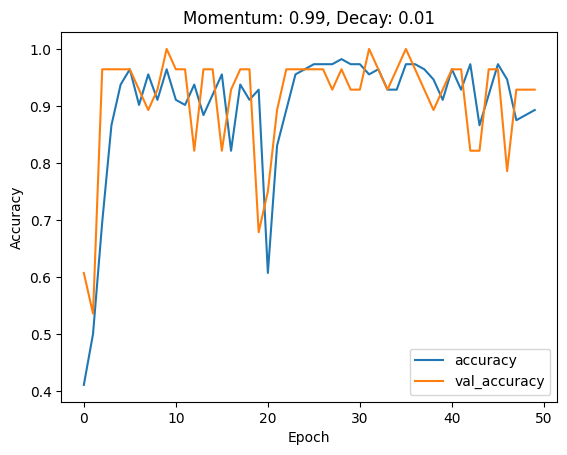

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5134 - loss: 0.6852 - val_accuracy: 0.5714 - val_loss: 0.6539
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5643 - loss: 0.6534 - val_accuracy: 0.6071 - val_loss: 0.6097
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6781 - loss: 0.6131 - val_accuracy: 0.9286 - val_loss: 0.5080
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9369 - loss: 0.5110 - val_accuracy: 0.8929 - val_loss: 0.2998
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9049 - loss: 0.3354 - val_accuracy: 0.9643 - val_loss: 0.1558
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9488 - loss: 0.1542 - val_accuracy: 0.9643 - val_loss: 0.0976
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9504 - loss: 0.1555 - val_accuracy: 0.9643 - val_loss: 0.0703
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9784 - loss: 0.0936 - val_accuracy: 0.9286 - val_loss: 0.4078


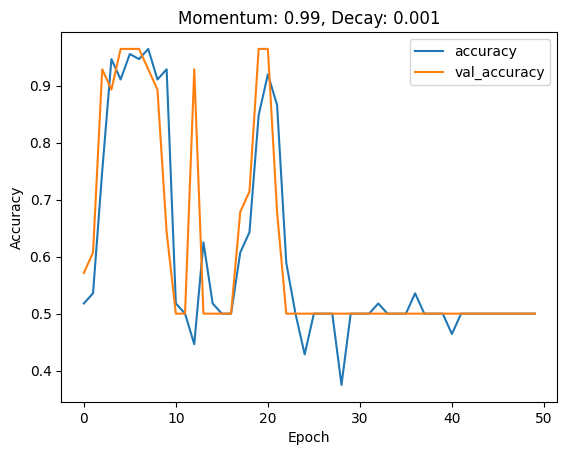

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5266 - loss: 0.7395 - val_accuracy: 0.5000 - val_loss: 0.6556
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5042 - loss: 0.6808 - val_accuracy: 0.6429 - val_loss: 0.5567
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7336 - loss: 0.5340 - val_accuracy: 0.9286 - val_loss: 0.4710
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8652 - loss: 0.4395 - val_accuracy: 0.8929 - val_loss: 0.2611
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8836 - loss: 0.2604 - val_accuracy: 0.9286 - val_loss: 0.1685
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9292 - loss: 0.1994 - val_accuracy: 0.9643 - val_loss: 0.1018
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9381 - loss: 0.1861 - val_accuracy: 0.9286 - val_loss: 0.0857
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9335 - loss: 0.2187 - val_accuracy: 0.9643 - val_loss: 0.0687


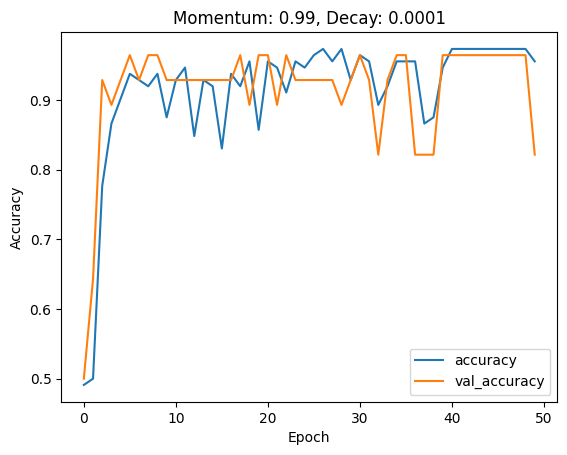

Best Results - Momentum: 0.9, Decay: 0.01, Accuracy: 1.0


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

best_learning_rate = 0.1
momentum_values = [0.0, 0.5, 0.9, 0.99]
decay_values = [1E-1, 1E-2, 1E-3, 1E-4]

best_results = {}

for momentum in momentum_values:
    for decay in decay_values:
        model = keras.Sequential([
            layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
            layers.Dense(8, activation='relu'),
            layers.Dense(num_classes, activation='softmax')
        ])

        model.compile(optimizer=keras.optimizers.SGD(learning_rate=best_learning_rate, momentum=momentum, decay=decay),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

        final_val_accuracy = history.history['val_accuracy'][-1]
        best_results[(momentum, decay)] = final_val_accuracy

        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Momentum: {momentum}, Decay: {decay}')
        plt.legend()
        plt.show()

best_momentum_decay = max(best_results, key=best_results.get)
print(f'Best Results - Momentum: {best_momentum_decay[0]}, Decay: {best_momentum_decay[1]}, Accuracy: {best_results[best_momentum_decay]}')

Best Results - Momentum: 0.9, Decay: 0.01, Accuracy: 1.0

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4685 - loss: 0.7323 - val_accuracy: 0.6071 - val_loss: 0.6600
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5750 - loss: 0.6678 - val_accuracy: 0.6429 - val_loss: 0.6408
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5771 - loss: 0.6595 - val_accuracy: 0.6786 - val_loss: 0.6254
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6857 - loss: 0.6344 - val_accuracy: 0.7143 - val_loss: 0.6143
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6549 - loss: 0.6318 - val_accuracy: 0.7143 - val_loss: 0.6040
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6698 - loss: 0.6267 - val_accuracy: 0.7143 - val_loss: 0.5948
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6946 - loss: 0.6232 - val_accuracy: 0.7143 - val_loss: 0.5861
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6111 - val_accuracy: 0.7143 - val_loss: 0.5782
Epoch 9/50


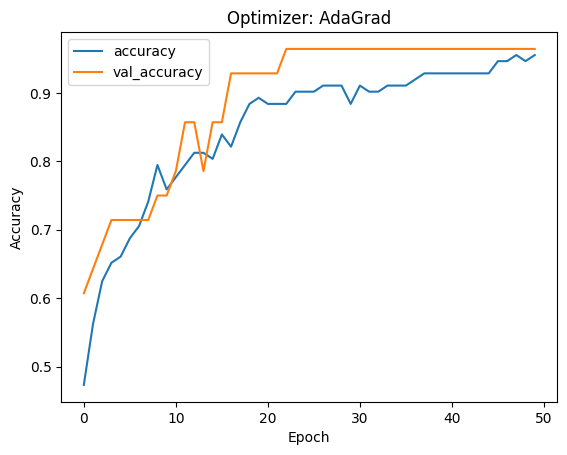

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3929 - loss: 0.7129 - val_accuracy: 0.5000 - val_loss: 0.6642
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5094 - loss: 0.6577 - val_accuracy: 0.5357 - val_loss: 0.6291
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5564 - loss: 0.6321 - val_accuracy: 0.6786 - val_loss: 0.5827
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6622 - loss: 0.5772 - val_accuracy: 0.6429 - val_loss: 0.5240
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6920 - loss: 0.5320 - val_accuracy: 0.8571 - val_loss: 0.4560
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8180 - loss: 0.4501 - val_accuracy: 0.9286 - val_loss: 0.3792
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9424 - loss: 0.3612 - val_accuracy: 0.9643 - val_loss: 0.3019
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9412 - loss: 0.3038 - val_accuracy: 0.9643 - val_loss: 0.2372


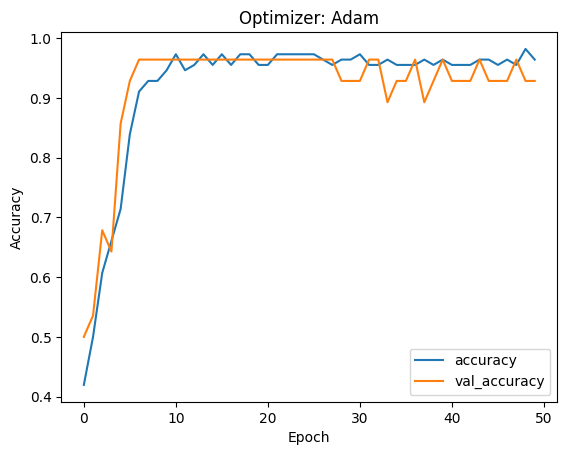

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.3987 - loss: 0.7815 - val_accuracy: 0.4643 - val_loss: 0.6868
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5173 - loss: 0.6685 - val_accuracy: 0.6429 - val_loss: 0.5779
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6176 - loss: 0.5817 - val_accuracy: 0.9286 - val_loss: 0.5213
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8150 - loss: 0.5398 - val_accuracy: 0.7857 - val_loss: 0.4573
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8046 - loss: 0.4675 - val_accuracy: 0.9286 - val_loss: 0.3967
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8562 - loss: 0.4306 - val_accuracy: 0.8214 - val_loss: 0.3634
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8711 - loss: 0.4024 - val_accuracy: 0.9286 - val_loss: 0.2905
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9030 - loss: 0.3139 - val_accuracy: 0.9643 - val_loss: 0.2303


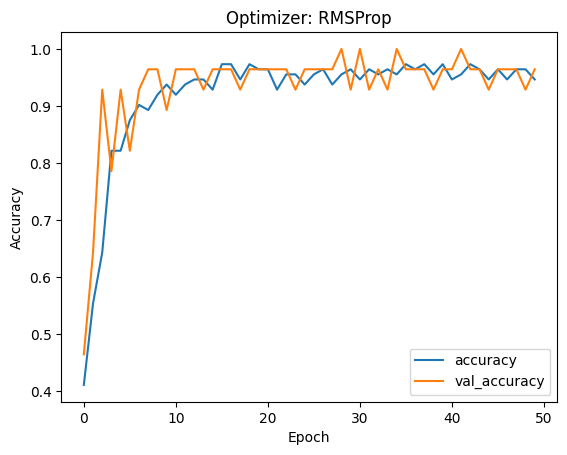

Best validation accuracy: 0.9642857313156128 with Optimizer: AdaGrad


In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

best_learning_rate = 0.01
optimizers = {
    'AdaGrad': keras.optimizers.Adagrad(learning_rate=best_learning_rate),
    'Adam': keras.optimizers.Adam(learning_rate=best_learning_rate),
    'RMSProp': keras.optimizers.RMSprop(learning_rate=best_learning_rate)
}

best_results = {}

for optimizer_name, optimizer in optimizers.items():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Optimizer: {optimizer_name}')
    plt.legend()
    plt.show()

    final_val_accuracy = history.history['val_accuracy'][-1]
    best_results[optimizer_name] = final_val_accuracy

best_optimizer = max(best_results, key=best_results.get)
print(f"Best validation accuracy: {best_results[best_optimizer]} with Optimizer: {best_optimizer}")

Best validation accuracy: 0.9642857313156128 with Optimizer: AdaGrad